In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

path = 'road-game-default-rtdb-export.json'

branchs = ['all-games','complete-games']
childs = ['additional_comments',
          'log',
         'aggressively_value',
         'behavior',
         'birthYear',
         'computer_value',
         'drivinglicense',
         'education',
         'gender',
         'generously_value',
         'redScore',
          'blueScore',
         'steps',
         'win',
         'wisely_value']

# with open(path) as json_file:
#     data = json.load(json_file)
#     num_of_games = len(data[branchs[1]])
#     print("number of %s is %d" % (branchs[1], num_of_games))
#     for game_id in data[branchs[1]].values():
#         for child in childs:
#             print(child, game_id[child])
#         print()

In [2]:
#load data from the json file
with open(path) as train_file:
    data = json.load(train_file)

In [3]:
branch = branchs[1]
df = pd.DataFrame.from_dict(data[branch], orient='index')
df.reset_index(level=0, inplace=True)
df

,index,additional_comments,aggressively_value,behavior,birthYear,blueScore,computer_value,drivinglicense,education,gender,generously_value,log,press-the-read-instructions-button,redScore,steps,win,wisely_value
0,-MZiWIwdnrn8TJ034z2w,,5,carefulBehavior,1961,-10,5,valid,BA,male,6,"[None, {'blue': 'from: a6, action: left', 'red...",True,3,7,True,1
1,-MZiWUxZs8BvWglGhc9r,,2,carefulBehavior,1982,-11,6,valid,BA,female,4,"[None, {'blue': 'from: a6, action: left', 'red...",True,2,8,True,4
2,-MZiWYgxyToIiCSDQY8S,,5,aggressiveBehavior,1953,-94,7,valid,BA,female,2,"[None, {'blue': 'from: a6, action: left', 'red...",True,-105,5,False,6
3,-MZiWYz_z_BcQlpReXf_,,6,aggressiveBehavior,1990,6,7,valid,Master's degree,male,2,"[None, {'blue': 'from: a6, action: left', 'red...",True,1,9,True,2
4,-MZiWaNZ6n3K3AZDfr-q,,6,aggressiveBehavior,1953,-94,6,valid,BA,female,2,"[None, {'blue': 'from: a6, action: left', 'red...",True,-105,5,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-MZj55Ev79aO0EAwzM9U,,2,carefulBehavior,1984,-10,4,valid,BA,female,6,"[None, {'blue': 'from: a6, action: left', 'red...",True,3,7,True,4
96,-MZj9IqoiqXvW2JHstPR,,2,aggressiveBehavior,1972,6,7,valid,High School,female,6,"[None, {'blue': 'from: a6, action: left', 'red...",True,2,8,True,4
97,-MZj9QsFKzqjSmi0lyc3,,2,carefulBehavior,1978,-12,4,valid,High School,male,5,"[None, {'blue': 'from: a6, action: left', 'red...",True,1,9,True,2
98,-MZjCIu-JGJGnQs73IMe,,6,semiAggressiveBehavior,1984,-106,6,valid,BA,male,6,"[None, {'blue': 'from: a6, action: left', 'red...",True,-104,4,False,6


In [4]:
df.columns

Index(['index', 'additional_comments', 'aggressively_value', 'behavior',
       'birthYear', 'blueScore', 'computer_value', 'drivinglicense',
       'education', 'gender', 'generously_value', 'log',
       'press-the-read-instructions-button', 'redScore', 'steps', 'win',
       'wisely_value'],
      dtype='object')

## Survay results: 

In [5]:
df['additional_comments']

0      
1      
2      
3      
4      
     ..
95     
96     
97     
98     
99     
Name: additional_comments, Length: 100, dtype: object

In [6]:
df.groupby('behavior')[['blueScore','redScore','steps','win']].mean()

,blueScore,redScore,steps,win
behavior,,,,
aggressiveBehavior,-35.548387,-38.967742,6.387097,0.612903
carefulBehavior,-9.428571,2.285714,7.714286,1.000000
semiAggressiveBehavior,-72.000000,-74.121951,6.317073,0.292683


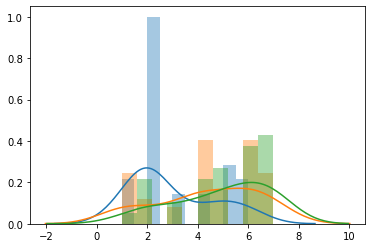

In [7]:
# Sort the dataframe by target
target_0 = df.loc[df['behavior'] == 'carefulBehavior']
target_1 = df.loc[df['behavior'] == 'semiAggressiveBehavior']
target_2 = df.loc[df['behavior'] == 'aggressiveBehavior']

sns.distplot(target_0[['aggressively_value']], bins = 10)
sns.distplot(target_1[['aggressively_value']], bins = 10)
sns.distplot(target_2[['aggressively_value']], bins = 10)

In [8]:
target_0[target_0['aggressively_value'] == '3'].count()

index                                 2
additional_comments                   2
aggressively_value                    2
behavior                              2
birthYear                             2
blueScore                             2
computer_value                        2
drivinglicense                        2
education                             2
gender                                2
generously_value                      2
log                                   2
press-the-read-instructions-button    2
redScore                              2
steps                                 2
win                                   2
wisely_value                          2
dtype: int64

In [9]:
target_0.count()

index                                 28
additional_comments                   28
aggressively_value                    28
behavior                              28
birthYear                             28
blueScore                             28
computer_value                        28
drivinglicense                        28
education                             28
gender                                28
generously_value                      28
log                                   28
press-the-read-instructions-button    28
redScore                              28
steps                                 28
win                                   28
wisely_value                          28
dtype: int64

Text(0.5, 0, 'aggressively_value')

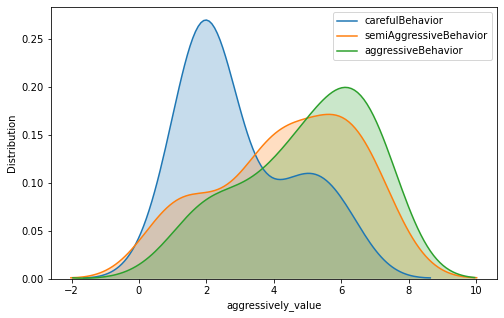

In [10]:
fig,(ax1) = plt.subplots(ncols=1, figsize=(8,5))
sns.kdeplot(df.aggressively_value[df['behavior'] == 'carefulBehavior'], label='carefulBehavior', shade=True)
sns.kdeplot(df.aggressively_value[df['behavior'] == 'semiAggressiveBehavior'], label='semiAggressiveBehavior', shade=True)
sns.kdeplot(df.aggressively_value[df['behavior'] == 'aggressiveBehavior'], label='aggressiveBehavior', shade=True)
ax1.set_ylabel('Distribution')
ax1.set_xlabel('aggressively_value')

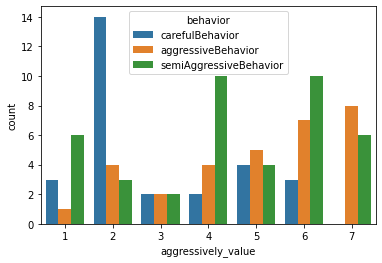

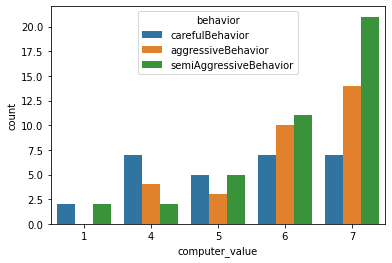

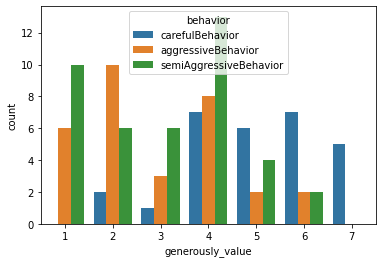

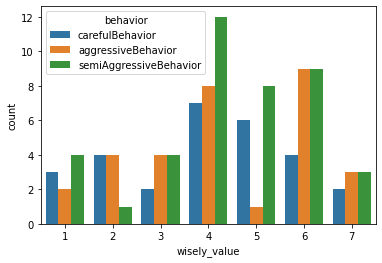

In [11]:
def count_plot_by_behavior(feature):
    sns.countplot(x=df[feature],hue=df['behavior'])
    plt.show()
    
for value in ['aggressively_value', 'computer_value', 'generously_value', 'wisely_value']:
    count_plot_by_behavior(value)

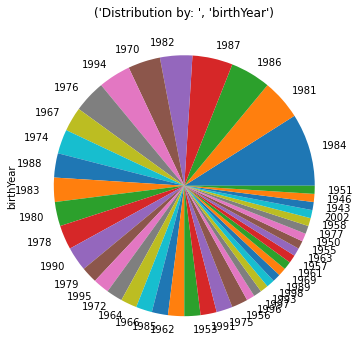

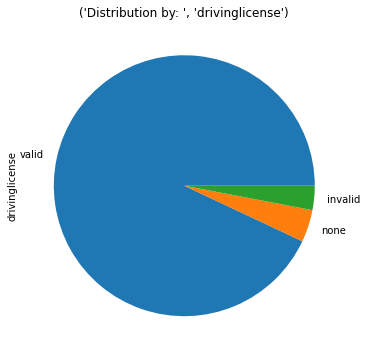

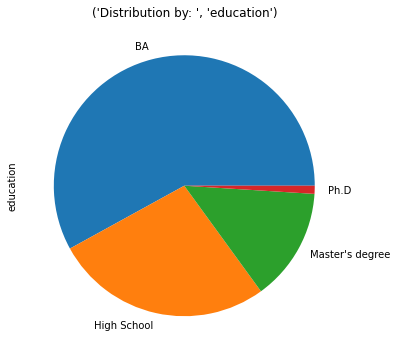

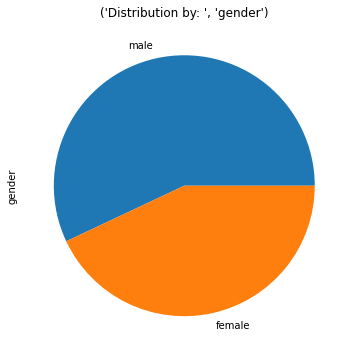

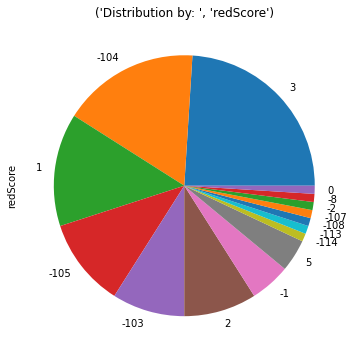

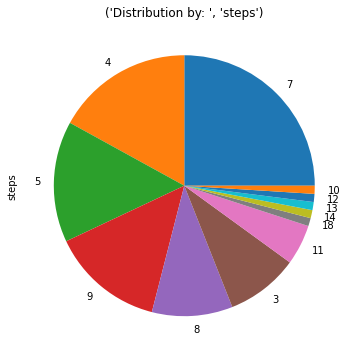

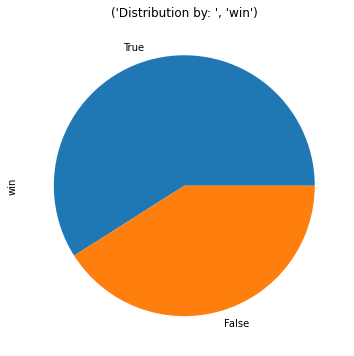

In [12]:
def pie_count_plot(feature):
    list_gen=df[feature].value_counts().plot.pie(figsize=(6, 6))
    title = 'Distribution by: ', feature
    plt.title(title)
    plt.show()
    
for value in ['birthYear', 'drivinglicense', 'education', 'gender', 'redScore', 'steps', 'win']:
    pie_count_plot(value)

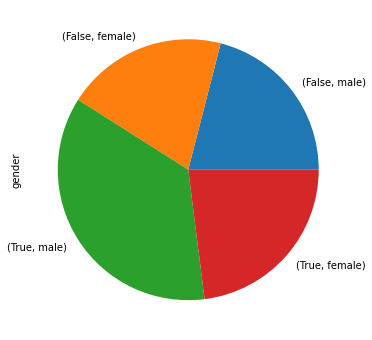

In [13]:
df.groupby('win')['gender'].value_counts().plot.pie(figsize=(6, 6))

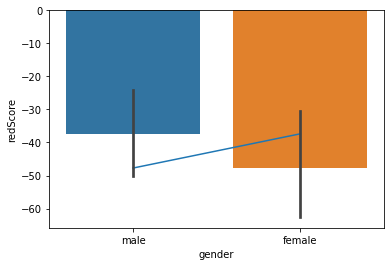

In [14]:
df.groupby('gender')['redScore'].mean().plot()
sns.barplot(y='redScore',x='gender', data=df)

In [15]:
df.groupby('gender').describe()

blueScore                                                     redScore  \
           count       mean        std    min    25%   50%  75%  max    count   
gender                                                                          
female      43.0 -47.720930  51.784041 -106.0 -105.0 -10.0  5.5  6.0     43.0   
male        57.0 -39.754386  49.997957 -106.0 -105.0 -10.0  5.0  6.0     57.0   

                   ...           steps                                     \
             mean  ...  75%  max count      mean       std  min  25%  50%   
gender             ...                                                      
female -47.744186  ...  2.0  3.0  43.0  6.581395  2.701257  3.0  4.5  7.0   
male   -37.368421  ...  3.0  5.0  57.0  6.842105  2.763212  3.0  4.0  7.0   

                   
        75%   max  
gender             
female  8.0  18.0  
male    9.0  14.0  

[2 rows x 24 columns]

In [16]:
df.describe()

,blueScore,redScore,steps
count,100.000000,100.000000,100.000000
mean,-43.180000,-41.830000,6.730000
std,50.669334,52.701763,2.726062
min,-106.000000,-114.000000,3.000000
25%,-105.000000,-104.000000,4.000000
50%,-10.000000,1.000000,7.000000
75%,5.000000,3.000000,8.000000
max,6.000000,5.000000,18.000000


# Statistics of the red agent movements:

In [17]:
new_df = pd.concat([pd.DataFrame(pd.json_normalize(x)) for x in df['log']],ignore_index=True)

AttributeError: 'NoneType' object has no attribute 'values'

In [158]:
statistics_raw = pd.DataFrame.from_dict(data['all-games'], orient='index')
log_red = flat_table.normalize(statistics_raw).iloc[:,-2:]
log_red = log_red.dropna()
log_red['log.red'] = log_red['log.red'] + ' ' + log_red['log.blue']
log_red = log_red.drop('log.blue', axis=1)
log_red['log.red'] = log_red.apply(lambda x: x['log.red'].rsplit(' ', 1)[0], axis = 1)
log_red['log.red'] = log_red.apply(lambda x: x['log.red'].replace('from: ', '', 2), axis = 1)
log_red['log.red'] = log_red.apply(lambda x: x['log.red'].replace(', action:', '', 2), axis = 1)
log_red['log.red'] = log_red['log.red'].str.split().apply(reversed).apply(' '.join)
log_red['value']=1

log_red['action'] = log_red['log.red'].str.split().str[1]
log_red['log.red'] = log_red.apply(lambda x: x['log.red'].replace(x['action'], '', 2), axis = 1)


log_red = log_red.groupby(['log.red', 'action']).count()

log_red.reset_index(inplace=True)
log_red = log_red.set_index('log.red')

# log_red.rename(columns = {'value': 'ido'}, inplace = False)
# log_red.replace(to_replace =["from: a1, action: right"], 
#                             value ="ido")
log_red

,action,value
log.red,,
a1 a2,right,5
a1 a3,right,24
a1 a4,right,32
a1 a5,right,34
a1 b1,stay,19
...,...,...
b4 a4,right,26
b4 a4,stay,2
b4 a5,right,26


In [160]:
idx = log_red.index.drop_duplicates()
result = pd.DataFrame('x', index=log_red.index.drop_duplicates(), columns=['right', 'stay', 'up', 'down'])
# result.reset_index(level=0, inplace=True)
result

,right,stay,up,down
log.red,,,,
a1 a2,x,x,x,x
a1 a3,x,x,x,x
a1 a4,x,x,x,x
a1 a5,x,x,x,x
a1 b1,x,x,x,x
a1 b2,x,x,x,x
a1 b3,x,x,x,x
a2 a1,x,x,x,x
a2 a3,x,x,x,x


In [36]:
def flatten(js):
    return pd.DataFrame(js).squeeze()

a = df.log.apply(flatten).drop(0, axis=1)
# a = a.fillna()
a

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,"{'blue': 'from: a6, action: left', 'red': 'fro...","{'blue': 'from: a5, action: left', 'red': 'fro...","{'blue': 'from: a4, action: down', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: up', 'red': 'from:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'blue': 'from: a6, action: left', 'red': 'fro...","{'blue': 'from: a5, action: left', 'red': 'fro...","{'blue': 'from: a4, action: down', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: up', 'red': 'from:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'blue': 'from: a6, action: left', 'red': 'fro...","{'blue': 'from: a5, action: left', 'red': 'fro...","{'blue': 'from: a4, action: left', 'red': 'fro...","{'blue': 'from: a3, action: left', 'red': 'fro...","{'blue': 'from: a2, action: left', 'red': 'fro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'blue': 'from: a6, action: left', 'red': 'fro...","{'blue': 'from: a5, action: left', 'red': 'fro...","{'blue': 'from: a4, action: left', 'red': 'fro...","{'blue': 'from: a3, action: left', 'red': 'fro...","{'blue': 'from: a2, action: left', 'red': 'fro...","{'blue': 'from: a1, action: stay', 'red': 'fro...","{'blue': 'from: a1, action: stay', 'red': 'fro...","{'blue': 'from: a1, action: stay', 'red': 'fro...","{'blue': 'from: a1, action: stay', 'red': 'fro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'blue': 'from: a6, action: left', 'red': 'fro...","{'blue': 'from: a5, action: left', 'red': 'fro...","{'blue': 'from: a4, action: left', 'red': 'fro...","{'blue': 'from: a3, action: left', 'red': 'fro...","{'blue': 'from: a2, action: left', 'red': 'fro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"{'blue': 'from: a6, action: left', 'red': 'fro...","{'blue': 'from: a5, action: left', 'red': 'fro...","{'blue': 'from: a4, action: down', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: up', 'red': 'from:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,"{'blue': 'from: a6, action: left', 'red': 'fro...","{'blue': 'from: a5, action: left', 'red': 'fro...","{'blue': 'from: a4, action: left', 'red': 'fro...","{'blue': 'from: a3, action: left', 'red': 'fro...","{'blue': 'from: a2, action: left', 'red': 'fro...","{'blue': 'from: a1, action: stay', 'red': 'fro...","{'blue': 'from: a1, action: stay', 'red': 'fro...","{'blue': 'from: a1, action: stay', 'red': 'fro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,"{'blue': 'from: a6, action: left', 'red': 'fro...","{'blue': 'from: a5, action: left', 'red': 'fro...","{'blue': 'from: a4, action: down', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: stay', 'red': 'fro...","{'blue': 'from: b4, action: up', 'red': 'from:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,"{'blue': 'from: a6, action: left', 'red': 'fro...","{'blue': 'from: a5, action: left', 'red': 'fro...","{'blue': 'from: a4, action: stay', 'red': 'fro...","{'blue': 'from: a4, action: left', 'red': 'fro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# pd.concat([pd.json_normalize(a[4]).add_prefix(f'{2}.') for i in a.columns], axis=1)

AttributeError: 'float' object has no attribute 'items'

In [149]:
red_moves.columns

Index(['right', 'stay', 'up', 'down'], dtype='object')

In [122]:
red_moves = pd.DataFrame.from_dict(data['statistics'], orient='index')
# red_moves.reset_index(level=0, inplace=True)
red_moves = red_moves.fillna(0)
red_moves

,right,stay,up,down
a1 a2,5.00,0.00,0.00,0.00
a1 a3,24.00,0.00,0.00,0.00
a1 a4,32.00,0.00,0.00,0.00
a1 a5,34.00,0.00,0.00,0.00
a2 a1,2.00,4.00,0.00,4.00
a2 a3,8.00,0.00,0.00,0.00
a2 a4,2.00,0.00,0.00,0.00
a3 a1,3.00,5.00,0.00,2.00
a3 a2,4.00,1.00,0.00,13.00
a3 a5,3.00,0.00,0.00,0.00


## Distribution of red agent movements:

In [123]:
pd.options.display.float_format = "{:,.2f}".format
red_moves.div(red_moves.sum(axis=1), axis=0)

,right,stay,up,down
a1 a2,1.00,0.00,0.00,0.00
a1 a3,1.00,0.00,0.00,0.00
a1 a4,1.00,0.00,0.00,0.00
a1 a5,1.00,0.00,0.00,0.00
a2 a1,0.20,0.40,0.00,0.40
a2 a3,1.00,0.00,0.00,0.00
a2 a4,1.00,0.00,0.00,0.00
a3 a1,0.30,0.50,0.00,0.20
a3 a2,0.22,0.06,0.00,0.72
a3 a5,1.00,0.00,0.00,0.00
